# City of New York Motor Vehicle Crash Data Analysis

## Introduction
In our project, we explored the Motor Vehicles Collisions dataset which comes from the city of New York. The dataset contains information on motor vehicle crashes that occured from 2012-2013. 

Motor crashes are a major public health and safety concern, particularly in urban areas with high traffic volumes such as New York City. In recent years, the city has seen a significant increase in the number of motor crashes, leading to a growing concern about their impact on public safety, transportation infrastructure, and economic productivity. To address these concerns, data analysis can play a crucial role in identifying the factors that contribute to motor crashes and developing effective strategies for prevention and mitigation. 

This paper aims to analyze the data on motor crashes in New York City over the past few years, with a focus on identifying the key factors associated with these incidents and proposing actionable solutions to reduce their frequency and severity. We aim to find a relationship between the data included and how severe the crashes are for people. We hope the analysis conducted in the project will lead key desicion makers to improving safety and road rules.

### Data
The data used in our project can be found here: https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes. This link contains different types of files that can be used for data analysis.

The dataset includes a row for each crash event. A crash event is recorded by the NYPD when there is a collision that has someone injured or killed, or if the damages incurred exceed $1000.

We took down key things of note to consider when analyzing our dataset. For starters, we only worked with years 2022 as going back too far in time would cause too much compute for how much memory we have. As such, an area of future exploration would relate to cross checking against previous years to understand how different changes in roads have affected car crashes. Another limitation of the dataset was that the reports are subject to change once the NYPD submits the MV-104AN forms, which can cause changes to crash details. This limited us from use the most current crash data. 

## EDA

To begin our analysis, we wanted to explore many different aspects of the data. Below are some of the key plots that were generated as well as a short takeaway of the relationship being displayed.


In [1]:
from IPython.display import Image, HTML

### Plotting Total Casualties

We were interested to see what the collision rate looked like across different locations in New York City. In our Anaylsis.ipynb file, you can find an interactive graph which shows each incident report in 2022. Below is a screenshot of the graph. 

Most locations have a count of casualties in the range of 0-6 roughly, with a few locations with around 10-14 casualties. 

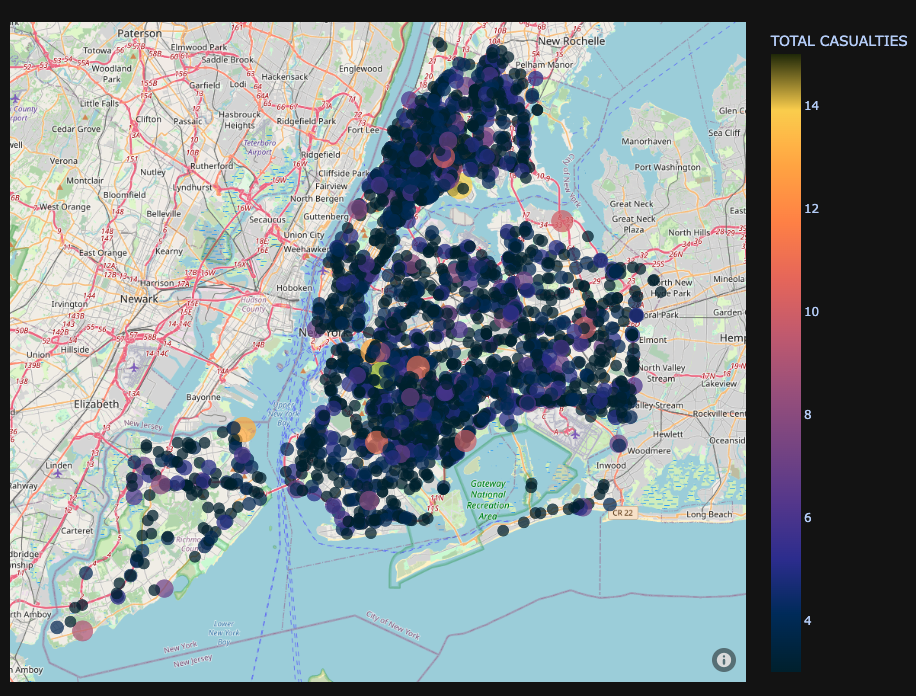

In [2]:
Image("Charts/Total Casualties.png")

### Collision Data By Borough

The chart below highlights collisions in respective boroughs. The data represents collisions per 1000 people and as such it makes sense that Manhattan's rate is slightly deflated against Queens, Brooklyn, and the Bronx since its population is much greater. This plot helped us to feel more confident that the location has somewhat of an effect since even when accounting for population, boroughs have significant discrepencies to their number of crashes. 

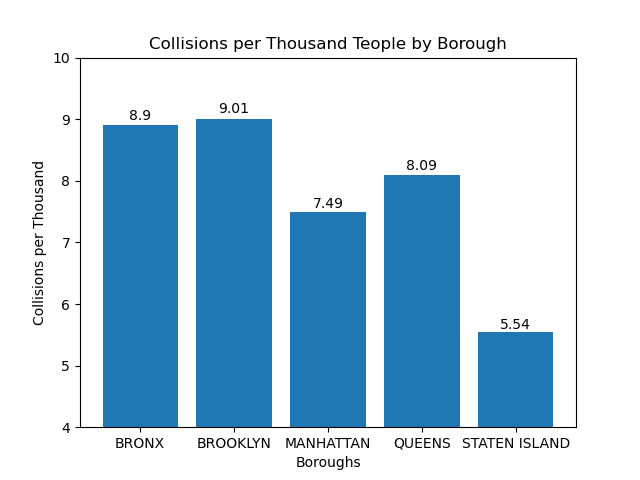

In [3]:
Image("Charts/Collisions per Thousand People by Borough.png")

### Collision Data By Zipcode

We also created a chloropleth map of collisions by zip code to clearly demarcate which zip codes had the most collisions. The interactive graph helped to get an overvall picture of the situation, but it was hard to visualize clusters by geography so we created this map.

As demonstrated earlier in the interactive graph, most collision counts are pretty low. In the map below there's only zip code that has a high count of collisions which we thought was interesting.

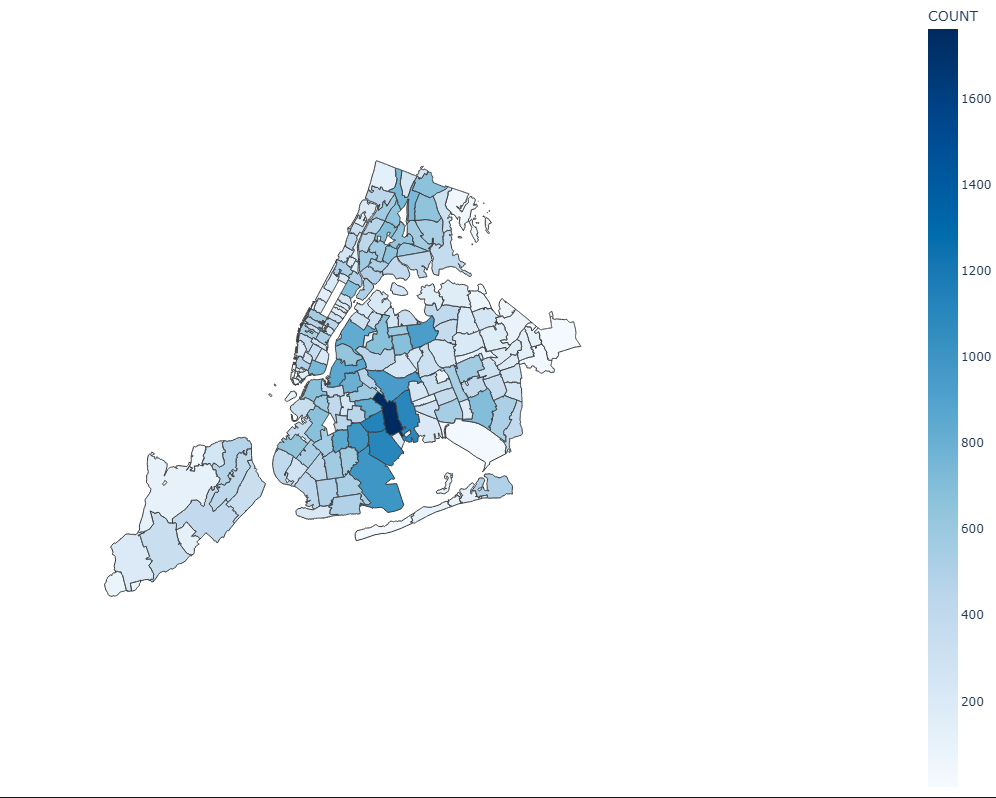

In [4]:
Image("Charts/Chloropleth Plot of Zip Code.png")

### Collision Data By Vehicle Type

This chart breaks down collisions between injuries and fatalities. It also breaks down collisions by vehicle type either pedestrian, motorist, or bicycle. This helped us to understand where the bulk of fatal crashes were occurring and on what kind of vehicle. While we did not choose to continue this exploration, further analysis could delve into what areas of the city were particularly prone to crashes for different kinds of transporters (i.e streets with no bike lanes may have higher risk of fatality). 

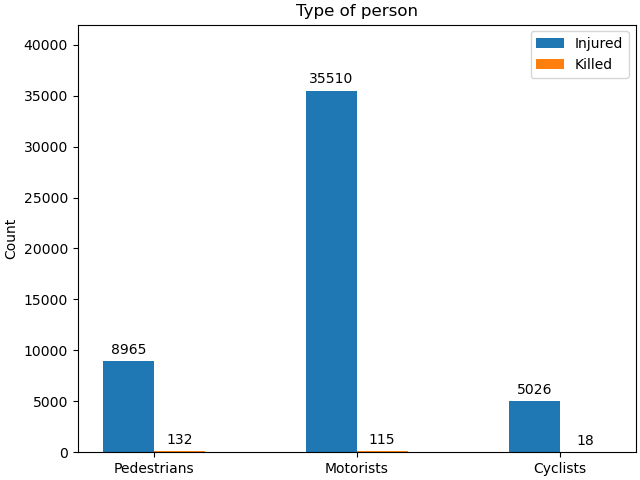

In [5]:
Image("Charts/Collisons by Vehicle.png")

### Collisions By Contributing Factor Vehicle 1

We plotted the top 10 occurrences in the Contributing Factor Vehicle 1 column. The biggest reasons were Driver Inattention/Distraction, Failure to Yield Right of Way, and Following Too Closely. 

There are 4 more Contributing Factor columns, but we decided not to make plots for these columns as the biggest reason in the pie chart was consistently Unspecified, so the visualizations were not very helpful.

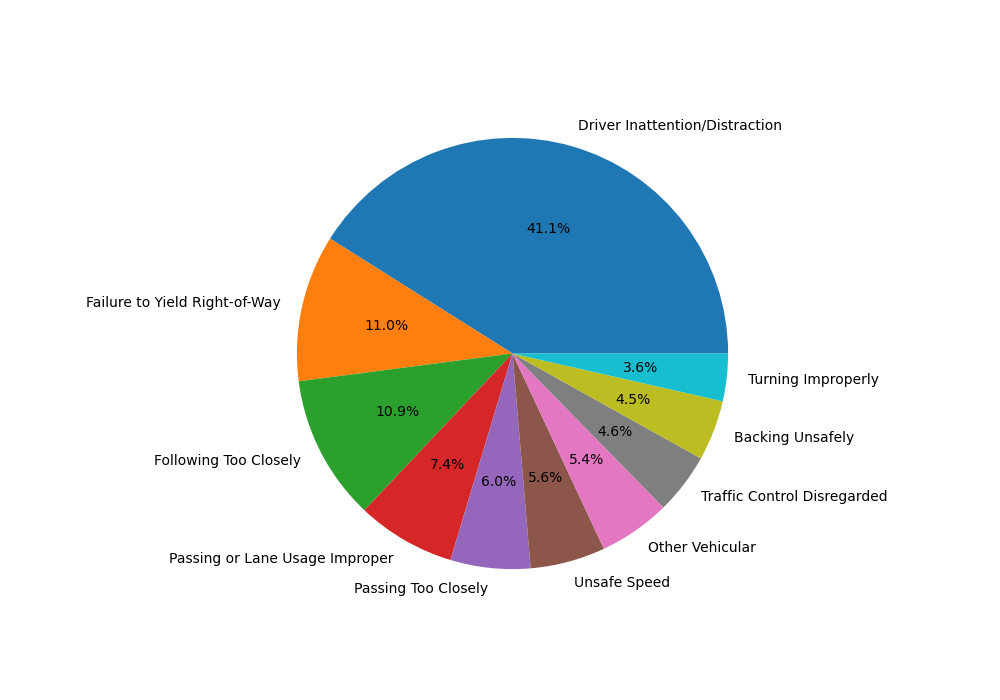

In [6]:
Image("Charts/Collisions by Contributing Factor.png")

### Collisions By Vehicle Type Code 1

We also plotted the top 10 occurrences in the Vehicle Type Code 1 column to see which types of vehicles were the most involved in collisions and if that could inform safety designs for these cars in the future or other policies. Sedans and Station Wagons/Sport Utility Vehicles were the most prevalent in collisions.

Similar to the Contributing Factor columns, we decided not to make plots for the remaining Vehicle Type Code columns as they came out to roughly the same breakdown.

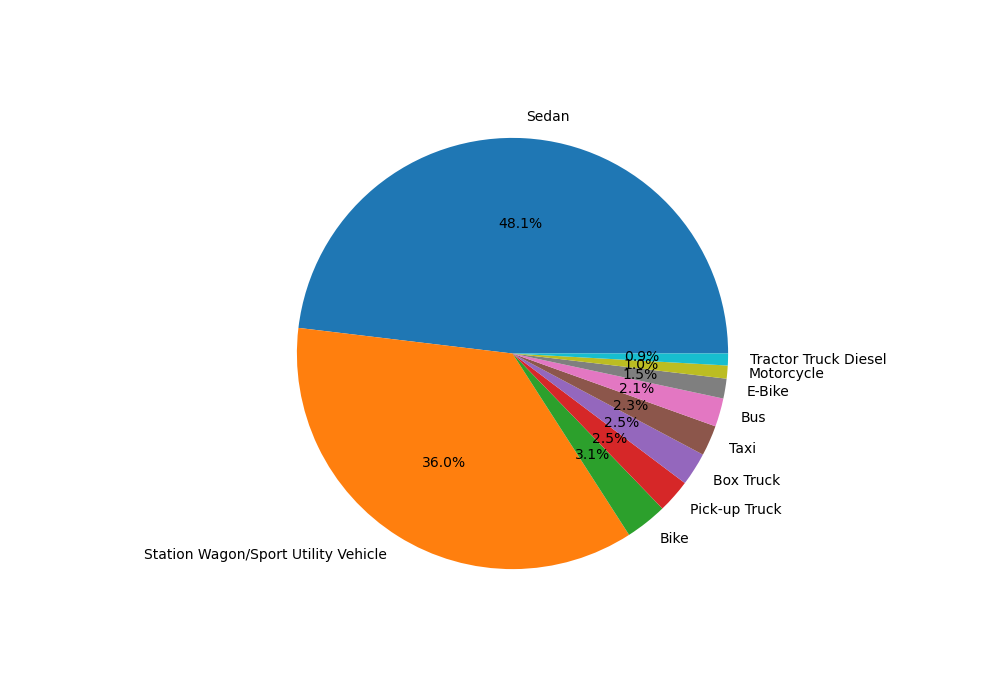

In [7]:
Image("Charts/Collisions by Vehicle Type Code 1.png")

### Collisions By Month

Our next variable of investigation was collisions by time, starting off with month. February has the least number of collisions while mid April-June have the highest, almost identical number. From January to June, the count increases with a sharp spike from February to March. After June, the count drops slightly but we see a sharp decline from October-November.

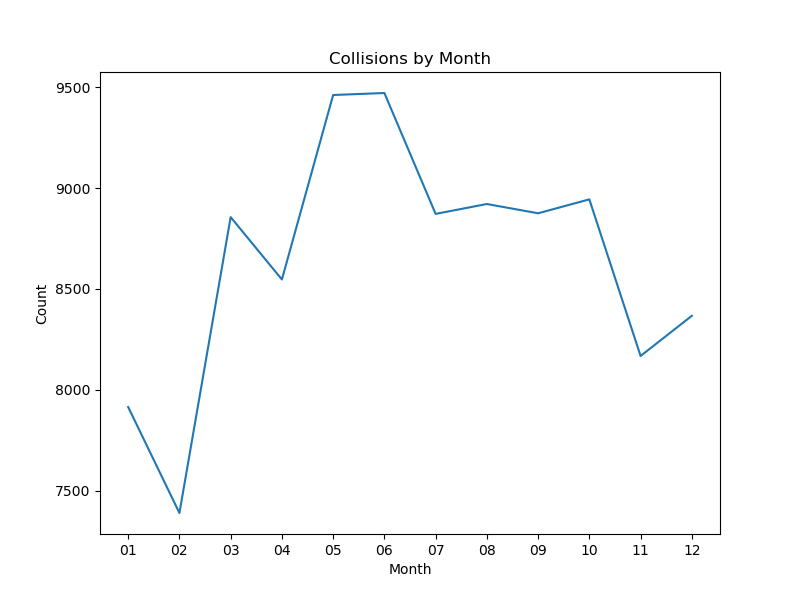

In [8]:
Image("Charts/Collisions by Month.png")

### Collisions By Day

Then we looked at collisions on each day of the week. Monday-Thursday and Saturday had roughly identical counts while Friday had the highest count and Sunday had the lowest count. This intuitively makes sense considering peoples' work weeks and behaviors on Friday and Sunday.

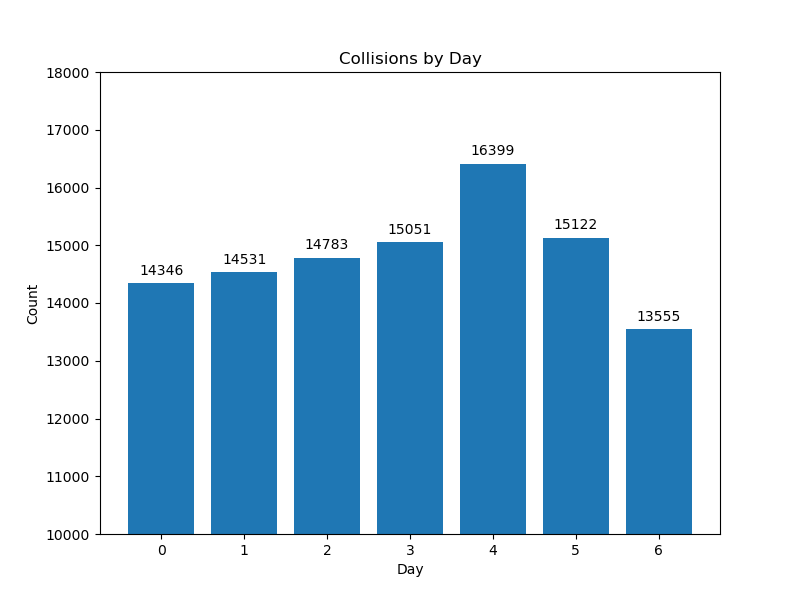

In [9]:
Image("Charts/Collisions by Day.png")

### Collisions By Hour Stratified by Weekday or Weekend

Considering that weekends seem to have more collisions, we next looked at collisions by hour of day stratified by weekday or weekend. The lines follow roughly similar paths. 

The weekday line dips around 1am and stays low until 5 am roughly, after which the line sharply increases around 8am presumably when people are driving to work. The line fluctuates downward until 1pm to 3pm and then sharply declines at 6 to 11pm when people are coming home from work, taking children to their activities, going out for plans, or more.

The weekend line dips as well, but has a slight spike from 3-4am, and steadily rises from 7am to 4pm and then slowly declines after that. 

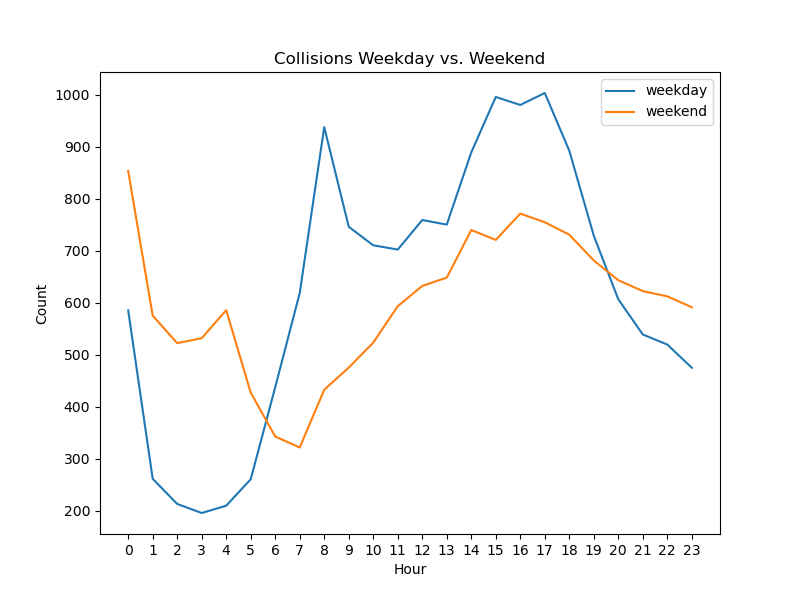

In [10]:
Image("Charts/Collisions Weekday vs. Weekend.png")

### Collisions by Hour from 2014-2022

We aggregated collisions by average count over each hour from 2014-2022. 2014-2019 have roughly similar lines. 2020-2022 aren't part of that group of lines. 2021 has the highest average count, perhaps because the pandemic was ending and people were exercising their freedom more. 2020 is in the middle of the 2014-2019 group of lines and 2021-2022 group, which is interesting. We had a hypothesis that 2020 would have the lowest average count due to the pandemic but that's rather 2015.

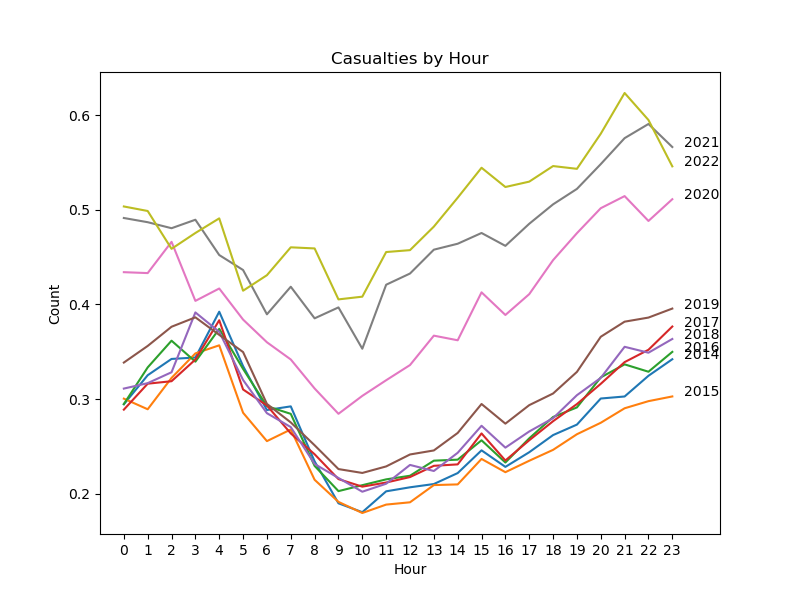

In [11]:
Image("Charts/Collisions 2015-2022.png")

### Total Collisions from 2014-2022

The final plot we made as part of EDA was aggregating collisions over 2014-2022. Each year varies differently, with 2021 have the highest count and 2018 with the lowest count.

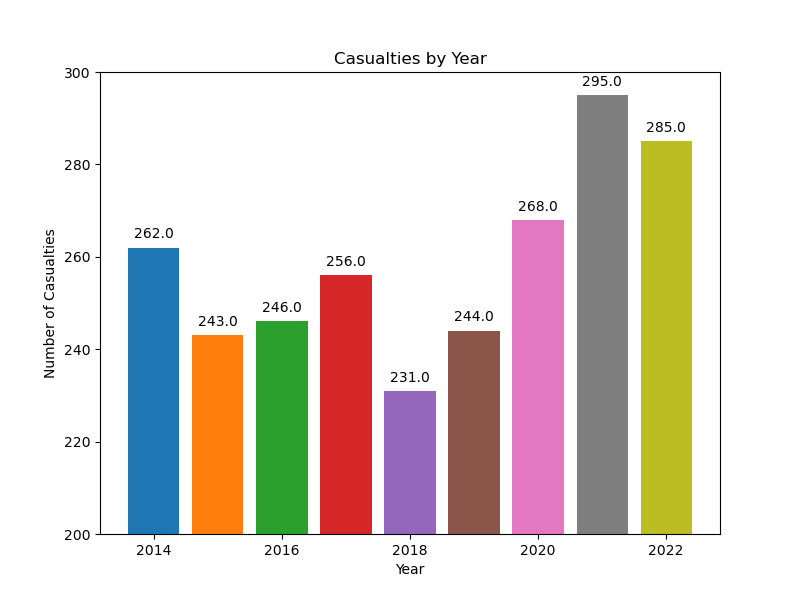

In [12]:
Image("Charts/Plot.png")

## Modeling

After our EDA, it became clear to our group that one area of exploration we wanted to dive further in was reguarding predicting where crashes occur most frequently. Specifically, we want to answer which locations in NY have the highest proportion of crashes, and if we are able to predict the amount of crashes in certain locations. We also want to explore if we can predict the severity of car crashes and potentially how that may be mitigated.

We wanted to see if we are able to predict the severity of a crash. First we define severity under the following criteria:

Minor injury level: 2 or less people injured, no death reported. Label: 0

Major injury level: 3 or more people injured, no death reported. Label: 1

Fatal injury level: at least one person killed. Label: 

From here, we developed a classification machine learning model using a random forest.

Our random forrest model had a training accuracy of 91.71 %

 In this case, a 90% accuracy rate for a random forest model means that the model is correctly predicting the injury severity of car accidents about 90% of the time. While this is a good start, there are several ways to further improve the model's accuracy.

One of the first steps to improve the model's accuracy is to explore feature engineering. Feature engineering involves selecting relevant features that are essential for predicting the outcome. In this case, the selected features might not be sufficient to accurately predict the injury severity of car accidents. Additional features such as weather conditions, road conditions, speed limits, or driver demographics may help improve the model's accuracy.

Another way to improve the model's performance is through hyperparameter tuning. Random forest models have several hyperparameters that can significantly impact their performance, such as the number of trees, maximum depth, and minimum samples per leaf. Tuning these hyperparameters using techniques like grid search or random search can help identify the optimal hyperparameters for the model, ultimately improving its performance.

Feature selection is also another approach to improve the model's accuracy. In some cases, certain features might not contribute to improving the model's performance or could be causing multicollinearity. Using feature selection techniques such as recursive feature elimination, LASSO regression, or chi-squared test can help identify the most relevant features for the model, ultimately improving its performance.

Finally, using ensemble methods such as bagging, boosting, or stacking can help improve the overall performance of the model. Ensemble methods combine multiple models to make more accurate predictions. By combining different models, ensemble methods can help mitigate the weaknesses of individual models, resulting in a more accurate prediction overall.

In conclusion, while a 90% accuracy rate for a random forest model is impressive, there are several ways to improve its accuracy even further. Exploring feature engineering, hyperparameter tuning, feature selection, and ensemble methods are all viable options to enhance the model's performance and make it more accurate in predicting injury severity for car accidents.

## Conclusion

Our random forest model is able to identify quite strong at being able to predict the severity of the crash. We were able to do this on a large sample and believe that our results are reproducible and accurate.

Other areas of exploration may be tackling one of our inital questions: which areas of New York are most prone to crashes? This may be used to help government officals change the road structure or traffic pattern to be better for people and safer. We also think this could be coupled with our analysis in this paper. If we are able to cut down on fatal crashes with road changes, countless number of lives can be saved in a year. 

## Author Contributions

Saumya Choudhary: Analysis file, EDA, Main notebook write up

Ashwin Bindra: EDA, Main notebook write up

Minghua Tan: Repo structure, makefile, Enviroment file

Tianyi Chen: Analysis file, EDA - Bivariate Analysis, Modelling and installable package